In [248]:
from pyscbwrapper import SCB
import pandas as pd
import numpy as np
import plotly.graph_objects as go

## Query first table
### Energy sources in sweden since 1986

In [133]:
scb = SCB('sv')
scb.go_down('EN')
scb.go_down('EN0105')
scb.go_down('EN0105A')
scb.go_down('ElProdAr')
scb.get_variables()
scb.set_query(produktionsslag=['total tillförsel av el',
                              'vattenkraft',
                              'pumpkraft',
                              'kärnkraft',
                              'konventionell värmekraft, fjärrvärme',
                              'konventionell värmekraft, industri',
                              'vindkraft',
                              'solkraft',
                              'konventionell värmekraft, kondensproduktion',
                              'konventionell värmekraft, gasturbin- och annan produktion',
                              'import'], 
              tabellinnehåll=['Brutto'], 
              år=['1986',
                  '1987',
                  '1988',
                  '1989',
                  '1990',
                  '1991',
                  '1992',
                  '1993',
                  '1994',
                  '1995',
                  '1996',
                  '1997',
                  '1998',
                  '1999',
                  '2000',
                  '2001',
                  '2002',
                  '2003',
                  '2004',
                  '2005',
                  '2006',
                  '2007',
                  '2008',
                  '2009',
                  '2010',
                  '2011',
                  '2012',
                  '2013',
                  '2014',
                  '2015',
                  '2016',
                  '2017',
                  '2018',
                  '2019',
                  '2020',
                  '2021',
                  '2022'])
scb.get_query()
data = scb.get_data()['data']

In [141]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Split the 'key' column into separate columns
df[['category', 'year']] = pd.DataFrame(df['key'].tolist(), index=df.index)

# Drop the original 'key' column
df.drop('key', axis=1, inplace=True)

# Rename the 'values' column
df.rename(columns={'values': 'value'}, inplace=True)

# Replace '..' with 0
df['value'] = df['value'].apply(lambda x: float(x[0]) if x[0] != '..' else 0)

# Convert the column to float type
df['value'] = df['value'].astype(float)

# Create Pivot table
pivot_df = df.pivot_table(index='year', columns='category', values='value')

# Rename columns
pivot_df.columns=['Gas Turbines', 'Import', 'Nuclear', 'Condensing Turbines', 'Main Activity Producer CHP', 'Autoproducer CHP',
       'Pumped Storage', 'Sum of Supply (GWh)', 'Hydro', 'Wind', 'Solar']

# Save with proper name
sweden_energy = pivot_df


In [142]:
sweden_energy # GWh

,Gas Turbines,Import,Nuclear,Condensing Turbines,Main Activity Producer CHP,Autoproducer CHP,Pumped Storage,Sum of Supply (GWh),Hydro,Wind,Solar
year,,,,,,,,,,,
1986,64.0,1835.0,69951.0,690.0,3550.0,2896.0,567.0,140486.0,60933.0,0.0,0.0
1987,81.0,2174.0,67385.0,509.0,3311.0,2837.0,594.0,148745.0,71854.0,0.0,0.0
1988,61.0,5064.0,69424.0,462.0,2861.0,2950.0,589.0,151294.0,69883.0,0.0,0.0
1989,85.0,12053.0,65603.0,278.0,2310.0,2889.0,175.0,155144.0,71750.0,0.0,0.0
1990,55.0,12909.0,68185.0,288.0,2290.0,2650.0,530.0,159417.0,72509.0,0.0,0.0
1991,64.0,6225.0,76761.0,366.0,3540.0,2978.0,426.0,153609.0,63249.0,0.0,0.0
1992,98.0,8847.0,63544.0,611.0,4136.0,3164.0,529.0,155292.0,74364.0,0.0,0.0
1993,145.0,7979.0,61395.0,463.0,4929.0,3616.0,565.0,153791.0,74647.0,52.0,0.0
1994,147.0,6680.0,73156.0,966.0,5325.0,3920.0,353.0,149718.0,59097.0,75.0,0.0


## Getting Age data

In [249]:
scb = SCB('sv')
scb.go_down('BE')
scb.go_down('BE0101')
scb.go_down('BE0101B')
scb.go_down('BefolkMedianAlder')
scb.get_variables()
scb.set_query(kön=['män','kvinnor','totalt'],
              tabellinnehåll=['Medelålder', 'Medianålder'], 
              år=['1968',
                  '1969',
                  '1970',
                  '1971',
                  '1972',
                  '1973',
                  '1974',
                  '1975',
                  '1976',
                  '1977',
                  '1978',
                  '1979',
                  '1980',
                  '1981',
                  '1982',
                  '1983',
                  '1984',
                  '1985',
                  '1986',
                  '1987',
                  '1988',
                  '1989',
                  '1990',
                  '1991',
                  '1992',
                  '1993',
                  '1994',
                  '1995',
                  '1996',
                  '1997',
                  '1998',
                  '1999',
                  '2000',
                  '2001',
                  '2002',
                  '2003',
                  '2004',
                  '2005',
                  '2006',
                  '2007',
                  '2008',
                  '2009',
                  '2010',
                  '2011',
                  '2012',
                  '2013',
                  '2014',
                  '2015',
                  '2016',
                  '2017',
                  '2018',
                  '2019',
                  '2020',
                  '2021',
                  '2022',
                  '2023'])
scb.get_query()
data = scb.get_data()['data']

In [256]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Split the 'key' column into separate columns
df[['category', 'year']] = pd.DataFrame(df['key'].tolist(), index=df.index)

# Drop the original 'key' column
df.drop('key', axis=1, inplace=True)

# Extract mean age and median age from the 'values' column
df['mean_age'] = df['values'].apply(lambda x: float(x[0]) if x[0] != '..' else np.nan)
df['median_age'] = df['values'].apply(lambda x: float(x[1]) if x[1] != '..' else np.nan)

# Drop the original 'values' column
df.drop('values', axis=1, inplace=True)
df['year'] = df['year'].astype(int)
# Rename categories
category_mapping = {'1': 'Male', '1+2': 'Total', '2': 'Female'}
df['category'] = df['category'].map(category_mapping)

# Create Pivot table
pivot_df = df.pivot_table(index='year', columns='category')

sweden_age_pivot = pivot_df
sweden_age = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    168 non-null    object 
 1   year        168 non-null    int64  
 2   mean_age    168 non-null    float64
 3   median_age  168 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.4+ KB


## Sorting Healthcare dataframe

In [212]:
scb = SCB('sv')
scb.go_down('NR')
scb.go_down('NR0109')
scb.go_down('HCBNP')
scb.set_query(tabellinnehål=['Totala hälso- och sjukvårdsutgifter, mnkr',
                              'BNP till marknadspris, mnkr',
                              'BNP relationstal, procent'],
              år=['2001',
                  '2002',
                  '2003',
                  '2004',
                  '2005',
                  '2006',
                  '2007',
                  '2008',
                  '2009',
                  '2010',
                  '2011',
                  '2012',
                  '2013',
                  '2014',
                  '2015',
                  '2016',
                  '2017',
                  '2018',
                  '2019',
                  '2020',
                  '2021',
                  '2022'])
scb.get_query()
data = scb.get_data()['data']

In [213]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Split the 'key' column into separate columns
df['year'] = pd.DataFrame(df['key'].tolist(), index=df.index)

# Drop the original 'key' column
df.drop('key', axis=1, inplace=True)

# Extract mean age and median age from the 'values' column
df['Total healthcare costs'] = df['values'].apply(lambda x: float(x[0]) if x[0] != '..' else 0)
df['GDP at marketprice'] = df['values'].apply(lambda x: float(x[1]) if x[1] != '..' else 0)
df['GDP Percent %'] = df['values'].apply(lambda x: float(x[2]) if x[2] != '..' else 0)

# Drop the original 'values' column
df.drop('values', axis=1, inplace=True)

df.set_index('year', inplace=True)

healthcare_sweden = df
healthcare_sweden

,Total healthcare costs,GDP at marketprice,GDP Percent %
year,,,
2001,197803.0,2503731.0,7.9
2002,213325.0,2598336.0,8.2
2003,224861.0,2703551.0,8.3
2004,230084.0,2830194.0,8.1
2005,238908.0,2931085.0,8.2
2006,251365.0,3121668.0,8.1
2007,265492.0,3320278.0,8.0
2008,280086.0,3412253.0,8.2
2009,293033.0,3341167.0,8.8


## Fourth out, data on house prices for new production

In [215]:
scb = SCB('sv')
scb.go_down('BO')
scb.go_down('BO0201')
scb.go_down('BO0201A')
scb.go_down('PrisPerAreorFH02')
scb.set_query(region=['Riket',
                      'Storstadsområdena',
                      'Stor-Stockholm',
                      'Stor-Göteborg',
                      'Stor-Malmö',
                      'Länsregionerna I - III',
                      'Länsregion I (norr)',
                      'Länsregion II (mitten)',
                      'Länsregion III (syd)'],
              bruttonettopris='brutto',
              tabellinnehål=['Byggnadsobjekt, antal som prisstatistiken baseras på',
                              'Lägenheter, antal som prisstatistiken baseras på',
                              'Lägenhetsarea/lägenhet, kvm',
                              'Markpris/lägenhetsarea, kr',
                              'Byggnadspris/lägenhetsarea, kr',
                              'Totalt produktionspris/lägenhetsarea, kr'],
              år=['1998',
                  '1999',
                  '2000',
                  '2001',
                  '2002',
                  '2003',
                  '2004',
                  '2005',
                  '2006',
                  '2007',
                  '2008',
                  '2009',
                  '2010',
                  '2011',
                  '2012',
                  '2013',
                  '2014',
                  '2015',
                  '2016',
                  '2017',
                  '2018',
                  '2019',
                  '2020',
                  '2021',
                  '2022'])
scb.get_query()
data = scb.get_data()['data']

In [218]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Split the 'key' column into separate columns
df[['region','category','year']] = pd.DataFrame(df['key'].tolist(), index=df.index)

# Drop the original 'key' column
df.drop('key', axis=1, inplace=True)

# Extract mean age and median age from the 'values' column
df['Amount of buildings'] = df['values'].apply(lambda x: float(x[0]) if x[0] != '..' else 0)
df['Amount of apartments'] = df['values'].apply(lambda x: float(x[1]) if x[1] != '..' else 0)
df['Apartment Area sqm/ Apartment'] = df['values'].apply(lambda x: float(x[2]) if x[2] != '..' else 0)
df['Property cost/Apartment Area sqm'] = df['values'].apply(lambda x: float(x[3]) if x[3] != '..' else 0)
df['Building cost/Apartment Area sqm'] = df['values'].apply(lambda x: float(x[4]) if x[4] != '..' else 0)
df['Total Production costs / Apartment Area sqm'] = df['values'].apply(lambda x: float(x[5]) if x[5] != '..' else 0)

# Drop the original 'values' column
df.drop('values', axis=1, inplace=True)

df.set_index('year', inplace=True)

construction_sweden = df
construction_sweden

,region,category,Amount of buildings,Amount of apartments,Apartment Area sqm/ Apartment,Property cost/Apartment Area sqm,Building cost/Apartment Area sqm,Total Production costs / Apartment Area sqm
year,,,,,,,,
1998,00,1,117.0,3932.0,77.8,1702.0,13337.0,15039.0
1999,00,1,116.0,3944.0,83.4,2620.0,14911.0,17531.0
2000,00,1,136.0,4633.0,81.4,2387.0,15763.0,18150.0
2001,00,1,159.0,5709.0,85.4,3491.0,18758.0,22249.0
2002,00,1,189.0,7598.0,83.6,3700.0,19774.0,23474.0
...,...,...,...,...,...,...,...,...
2018,6,2,73.0,3101.0,66.4,4375.0,30447.0,34822.0
2019,6,2,67.0,2718.0,64.1,3589.0,30535.0,34124.0
2020,6,2,53.0,1983.0,69.8,4018.0,32721.0,36738.0


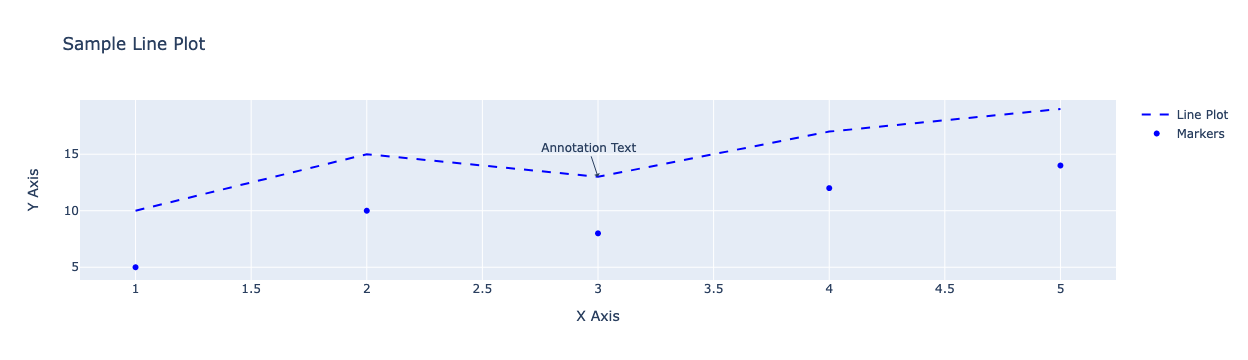

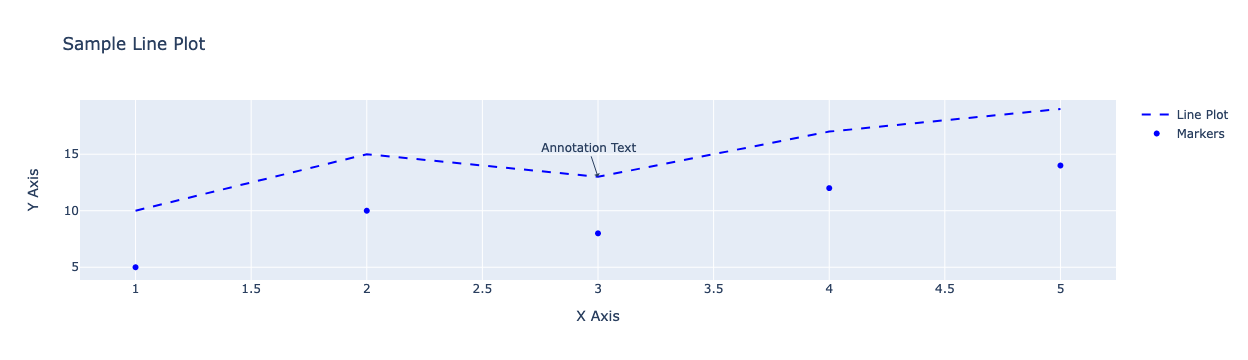

In [222]:


# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 17, 19]

# Create a figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Line Plot'))
fig.add_trace(go.Scatter(x=x, y=[v-5 for v in y], mode='markers', name='Markers'))

# Customizations
fig.update_layout(
    title='Sample Line Plot',
    xaxis_title='X Axis',
    yaxis_title='Y Axis'
)

fig.update_traces(
    line=dict(dash='dash', width=2, color='blue')
)

fig.add_annotation(
    x=3, y=13,
    text='Annotation Text',
    showarrow=True,
    arrowhead=1
)


fig.show()

# Show the figure
fig.show()


In [226]:
def get_age_data():
    # Initialize SCB client
    scb = SCB('sv')

    # Navigate to the desired dataset
    scb.go_down('BE')
    scb.go_down('BE0101')
    scb.go_down('BE0101B')
    scb.go_down('BefolkMedianAlder')

    # Set query parameters
    scb.set_query(kön=['män','kvinnor','totalt'],
                  tabellinnehåll=['Medelålder', 'Medianålder'], 
                  år=[str(year) for year in range(1968, 2024)])

    # Retrieve data
    data = scb.get_data()['data']

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Split the 'key' column into separate columns
    df[['category', 'year']] = pd.DataFrame(df['key'].tolist(), index=df.index)

    # Drop the original 'key' column
    df.drop('key', axis=1, inplace=True)

    # Extract mean age and median age from the 'values' column
    df['mean_age'] = df['values'].apply(lambda x: float(x[0]) if x[0] != '..' else np.nan)
    df['median_age'] = df['values'].apply(lambda x: float(x[1]) if x[1] != '..' else np.nan)

    # Drop the original 'values' column
    df.drop('values', axis=1, inplace=True)

    # Rename categories
    category_mapping = {'1': 'Male', '1+2': 'Total', '2': 'Female'}
    df['category'] = df['category'].map(category_mapping)

    # Create Pivot table
    pivot_df = df.pivot_table(index='year', columns='category')

    return pivot_df

age_df = get_age_data()

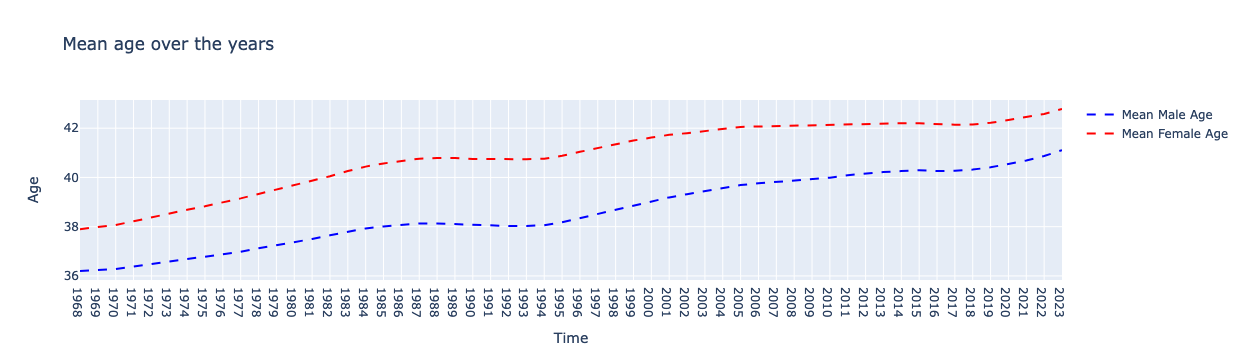

In [236]:


# Create a figure
fig = go.Figure()

# Add the first trace with blue color
fig.add_trace(go.Scatter(
    x=age_df.index, 
    y=age_df[('mean_age', 'Male')], 
    mode='lines', 
    name='Mean Male Age',
    line=dict(dash='dash', width=2, color='blue')
))

# Add the second trace with red color
fig.add_trace(go.Scatter(
    x=age_df.index, 
    y=age_df[('mean_age', 'Female')], 
    mode='lines', 
    name='Mean Female Age',
    line=dict(dash='dash', width=2, color='red')
))

# Customizations
fig.update_layout(
    title='Mean age over the years',
    xaxis_title='Time',
    yaxis_title='Age'
)

# Show the figure
fig.show()


In [232]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 1968 to 2023
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (mean_age, Female)    56 non-null     float64
 1   (mean_age, Male)      56 non-null     float64
 2   (mean_age, Total)     56 non-null     float64
 3   (median_age, Female)  56 non-null     float64
 4   (median_age, Male)    56 non-null     float64
 5   (median_age, Total)   56 non-null     float64
dtypes: float64(6)
memory usage: 5.1+ KB


<Axes: xlabel='year'>

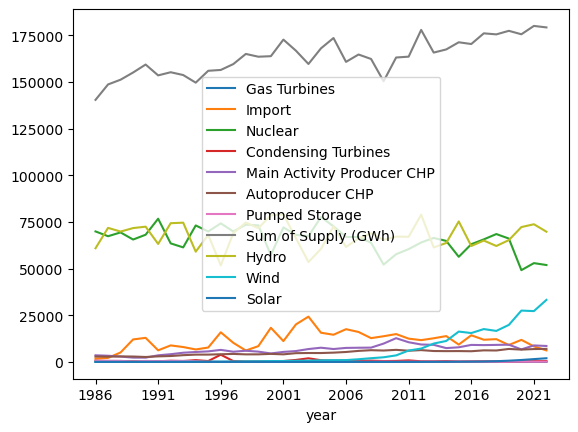

In [237]:
sweden_energy.plot()

In [258]:
scb = SCB('sv')
scb.info()

[{'id': 'AA', 'type': 'l', 'text': 'Ämnesövergripande statistik'},
 {'id': 'AM', 'type': 'l', 'text': 'Arbetsmarknad'},
 {'id': 'BE', 'type': 'l', 'text': 'Befolkning'},
 {'id': 'BO', 'type': 'l', 'text': 'Boende, byggande och bebyggelse'},
 {'id': 'EN', 'type': 'l', 'text': 'Energi'},
 {'id': 'FM', 'type': 'l', 'text': 'Finansmarknad'},
 {'id': 'HA', 'type': 'l', 'text': 'Handel med varor och tjänster'},
 {'id': 'HE', 'type': 'l', 'text': 'Hushållens ekonomi'},
 {'id': 'HS', 'type': 'l', 'text': 'Hälso- och sjukvård'},
 {'id': 'JO', 'type': 'l', 'text': 'Jord- och skogsbruk, fiske'},
 {'id': 'KU', 'type': 'l', 'text': 'Kultur och fritid'},
 {'id': 'LE', 'type': 'l', 'text': 'Levnadsförhållanden'},
 {'id': 'ME', 'type': 'l', 'text': 'Demokrati'},
 {'id': 'MI', 'type': 'l', 'text': 'Miljö'},
 {'id': 'NR', 'type': 'l', 'text': 'Nationalräkenskaper'},
 {'id': 'NV', 'type': 'l', 'text': 'Näringsverksamhet'},
 {'id': 'OE', 'type': 'l', 'text': 'Offentlig ekonomi'},
 {'id': 'PR', 'type': 'l'

In [259]:
scb.go_down('BE')
scb.info()

[{'id': 'BE0001', 'type': 'l', 'text': 'Namnstatistik'},
 {'id': 'BE0101', 'type': 'l', 'text': 'Befolkningsstatistik'},
 {'id': 'BE0205',
  'type': 'l',
  'text': 'Tidigare folk- och bostadsräkningar 1960-1990 (FoB)'},
 {'id': 'BE0401', 'type': 'l', 'text': 'Befolkningsframskrivningar'},
 {'id': 'BE0701', 'type': 'l', 'text': 'Demografisk analys (Demografi)'}]

In [260]:
scb.go_down('BE0101')
scb.info()

[{'id': 'BE0101A', 'type': 'l', 'text': 'Folkmängd'},
 {'id': 'BE0101G', 'type': 'l', 'text': 'Befolkningsförändringar'},
 {'id': 'BE0101H', 'type': 'l', 'text': 'Födda'},
 {'id': 'BE0101I', 'type': 'l', 'text': 'Döda'},
 {'id': 'BE0101J', 'type': 'l', 'text': 'Flyttningar - inrikes och utrikes'},
 {'id': 'BE0101D', 'type': 'l', 'text': 'Medelfolkmängd'},
 {'id': 'BE0101E', 'type': 'l', 'text': 'Utrikes födda'},
 {'id': 'BE0101F', 'type': 'l', 'text': 'Utländska medborgare'},
 {'id': 'BE0101Q', 'type': 'l', 'text': 'Utländsk/svensk bakgrund'},
 {'id': 'BE0101N', 'type': 'l', 'text': 'Medborgarskapsbyten'},
 {'id': 'BE0101B', 'type': 'l', 'text': 'Medelålder'},
 {'id': 'BE0101L', 'type': 'l', 'text': 'Gifta, Skilda och Änka/änkling'},
 {'id': 'BE0101O', 'type': 'l', 'text': 'Partnerskap'},
 {'id': 'BE0101S', 'type': 'l', 'text': 'Hushåll'},
 {'id': 'BE0101K', 'type': 'l', 'text': 'Adopterade'},
 {'id': 'BE0101M',
  'type': 'l',
  'text': 'Cirkulär migration – Äldre tabeller som inte län

In [ ]:
scb.go_down('BE0101A')
scb.info()